In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

workdir = "E://Ronny_TF//200914_reupload//Dataset//Scenario5_individual_model_approach"

Using TensorFlow backend.


In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

In [3]:
# hyperparameters of CNN
num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


In [4]:
#reset Keras Session for GPU memory refreshing
def reset_keras():
    sess = tf.compat.v1.keras.backend.get_session()
    tf.compat.v1.keras.backend.clear_session()
    sess.close()
    sess = tf.compat.v1.keras.backend.get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

AEW541_//n


W0917 12:36:20.939566  4544 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:514: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 12:36:20.941518  4544 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:71: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 12:36:20.942494  4544 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4076: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 12:36:20.961038  4544 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3900: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0917 12:36:21.009838  4544 dep

train_X shape: (392, 18988, 1)
392 train samples
98 test samples
StartTime : 2020-09-17 12:36:20.939566


W0917 12:36:22.478720  4544 deprecation.py:506] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:3363: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0917 12:36:22.972573  4544 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4123: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0917 12:36:22.992093  4544 deprecation_wrapper.py:119] From c:\users\a\anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



EndTime : 2020-09-17 12:36:23.005759
StartTime : 2020-09-17 12:36:23.005759
Train on 392 samples, validate on 98 samples
Epoch 1/40
392/392 [==============================] - 11s 27ms/step - loss: 5.7889 - mean_squared_error: 5.7889 - mean_absolute_error: 2.1863 - val_loss: 6.0287 - val_mean_squared_error: 6.0287 - val_mean_absolute_error: 2.2876
Epoch 2/40
392/392 [==============================] - 1s 2ms/step - loss: 5.1579 - mean_squared_error: 5.1579 - mean_absolute_error: 2.0431 - val_loss: 4.8193 - val_mean_squared_error: 4.8193 - val_mean_absolute_error: 2.0552
Epoch 3/40
392/392 [==============================] - 1s 2ms/step - loss: 4.3309 - mean_squared_error: 4.3309 - mean_absolute_error: 1.8978 - val_loss: 4.0147 - val_mean_squared_error: 4.0147 - val_mean_absolute_error: 1.8689
Epoch 4/40
392/392 [==============================] - 1s 2ms/step - loss: 3.9303 - mean_squared_error: 3.9303 - mean_absolute_error: 1.8356 - val_loss: 3.4325 - val_mean_squared_error: 3.4325 - val_m

392/392 [==============================] - 1s 2ms/step - loss: 0.3204 - mean_squared_error: 0.3204 - mean_absolute_error: 0.4442 - val_loss: 0.8474 - val_mean_squared_error: 0.8474 - val_mean_absolute_error: 0.8175
Epoch 37/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3211 - mean_squared_error: 0.3211 - mean_absolute_error: 0.4443 - val_loss: 0.8251 - val_mean_squared_error: 0.8251 - val_mean_absolute_error: 0.8058
Epoch 38/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3236 - mean_squared_error: 0.3236 - mean_absolute_error: 0.4349 - val_loss: 0.8039 - val_mean_squared_error: 0.8039 - val_mean_absolute_error: 0.7950
Epoch 39/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2818 - mean_squared_error: 0.2818 - mean_absolute_error: 0.4155 - val_loss: 0.7743 - val_mean_squared_error: 0.7743 - val_mean_absolute_error: 0.7790
Epoch 40/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3423 - mean_squared_error: 

Epoch 31/40
326/326 [==============================] - 1s 2ms/step - loss: 0.3072 - mean_squared_error: 0.3072 - mean_absolute_error: 0.4089 - val_loss: 1.3257 - val_mean_squared_error: 1.3257 - val_mean_absolute_error: 0.6710
Epoch 32/40
326/326 [==============================] - 1s 2ms/step - loss: 0.2463 - mean_squared_error: 0.2463 - mean_absolute_error: 0.3719 - val_loss: 1.3131 - val_mean_squared_error: 1.3131 - val_mean_absolute_error: 0.6638
Epoch 33/40
326/326 [==============================] - 1s 2ms/step - loss: 0.2727 - mean_squared_error: 0.2727 - mean_absolute_error: 0.3934 - val_loss: 1.2804 - val_mean_squared_error: 1.2804 - val_mean_absolute_error: 0.6475
Epoch 34/40
326/326 [==============================] - 1s 2ms/step - loss: 0.2399 - mean_squared_error: 0.2399 - mean_absolute_error: 0.3838 - val_loss: 1.2475 - val_mean_squared_error: 1.2475 - val_mean_absolute_error: 0.6246
Epoch 35/40
326/326 [==============================] - 1s 2ms/step - loss: 0.3462 - mean_squ

392/392 [==============================] - 1s 2ms/step - loss: 0.3502 - mean_squared_error: 0.3502 - mean_absolute_error: 0.4320 - val_loss: 3.7144 - val_mean_squared_error: 3.7144 - val_mean_absolute_error: 1.6591
Epoch 26/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3807 - mean_squared_error: 0.3807 - mean_absolute_error: 0.4556 - val_loss: 3.6413 - val_mean_squared_error: 3.6413 - val_mean_absolute_error: 1.6421
Epoch 27/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3337 - mean_squared_error: 0.3337 - mean_absolute_error: 0.4438 - val_loss: 3.5132 - val_mean_squared_error: 3.5132 - val_mean_absolute_error: 1.6082
Epoch 28/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3750 - mean_squared_error: 0.3750 - mean_absolute_error: 0.4832 - val_loss: 3.3079 - val_mean_squared_error: 3.3079 - val_mean_absolute_error: 1.5547
Epoch 29/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3236 - mean_squared_error: 

392/392 [==============================] - 1s 2ms/step - loss: 0.3210 - mean_squared_error: 0.3210 - mean_absolute_error: 0.4127 - val_loss: 1.6643 - val_mean_squared_error: 1.6643 - val_mean_absolute_error: 1.1809
Epoch 20/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2824 - mean_squared_error: 0.2824 - mean_absolute_error: 0.4083 - val_loss: 1.3783 - val_mean_squared_error: 1.3783 - val_mean_absolute_error: 1.1046
Epoch 21/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3075 - mean_squared_error: 0.3075 - mean_absolute_error: 0.4053 - val_loss: 1.4641 - val_mean_squared_error: 1.4641 - val_mean_absolute_error: 1.1212
Epoch 22/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3633 - mean_squared_error: 0.3633 - mean_absolute_error: 0.4419 - val_loss: 1.4790 - val_mean_squared_error: 1.4790 - val_mean_absolute_error: 1.1192
Epoch 23/40
392/392 [==============================] - 1s 2ms/step - loss: 0.3025 - mean_squared_error: 

393/393 [==============================] - 1s 2ms/step - loss: 0.1753 - mean_squared_error: 0.1753 - mean_absolute_error: 0.3204 - val_loss: 0.7230 - val_mean_squared_error: 0.7230 - val_mean_absolute_error: 0.5674
Epoch 14/40
393/393 [==============================] - 1s 2ms/step - loss: 0.2296 - mean_squared_error: 0.2296 - mean_absolute_error: 0.3280 - val_loss: 0.7063 - val_mean_squared_error: 0.7063 - val_mean_absolute_error: 0.5596
Epoch 15/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1352 - mean_squared_error: 0.1352 - mean_absolute_error: 0.2739 - val_loss: 0.7280 - val_mean_squared_error: 0.7280 - val_mean_absolute_error: 0.5721
Epoch 16/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1769 - mean_squared_error: 0.1769 - mean_absolute_error: 0.2910 - val_loss: 0.7164 - val_mean_squared_error: 0.7164 - val_mean_absolute_error: 0.5701
Epoch 17/40
393/393 [==============================] - 1s 2ms/step - loss: 0.2021 - mean_squared_error: 

393/393 [==============================] - 1s 2ms/step - loss: 0.2070 - mean_squared_error: 0.2070 - mean_absolute_error: 0.3050 - val_loss: 0.4730 - val_mean_squared_error: 0.4730 - val_mean_absolute_error: 0.3809
Epoch 8/40
393/393 [==============================] - 1s 2ms/step - loss: 0.2086 - mean_squared_error: 0.2086 - mean_absolute_error: 0.3043 - val_loss: 0.4778 - val_mean_squared_error: 0.4778 - val_mean_absolute_error: 0.3838
Epoch 9/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1823 - mean_squared_error: 0.1823 - mean_absolute_error: 0.2923 - val_loss: 0.4980 - val_mean_squared_error: 0.4980 - val_mean_absolute_error: 0.3866
Epoch 10/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1643 - mean_squared_error: 0.1643 - mean_absolute_error: 0.2799 - val_loss: 0.5110 - val_mean_squared_error: 0.5110 - val_mean_absolute_error: 0.3923
Epoch 11/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1766 - mean_squared_error: 0.

393/393 [==============================] - 6s 14ms/step - loss: 0.8852 - mean_squared_error: 0.8852 - mean_absolute_error: 0.5841 - val_loss: 0.9892 - val_mean_squared_error: 0.9892 - val_mean_absolute_error: 0.5608
Epoch 2/40
393/393 [==============================] - 1s 2ms/step - loss: 0.6737 - mean_squared_error: 0.6737 - mean_absolute_error: 0.4995 - val_loss: 1.1180 - val_mean_squared_error: 1.1180 - val_mean_absolute_error: 0.5953
Epoch 3/40
393/393 [==============================] - 1s 2ms/step - loss: 0.6035 - mean_squared_error: 0.6035 - mean_absolute_error: 0.4978 - val_loss: 0.9499 - val_mean_squared_error: 0.9499 - val_mean_absolute_error: 0.5685
Epoch 4/40
393/393 [==============================] - 1s 2ms/step - loss: 0.4623 - mean_squared_error: 0.4623 - mean_absolute_error: 0.4415 - val_loss: 0.9021 - val_mean_squared_error: 0.9021 - val_mean_absolute_error: 0.5618
Epoch 5/40
393/393 [==============================] - 1s 2ms/step - loss: 0.4221 - mean_squared_error: 0.4

393/393 [==============================] - 1s 2ms/step - loss: 0.1092 - mean_squared_error: 0.1092 - mean_absolute_error: 0.2427 - val_loss: 0.8154 - val_mean_squared_error: 0.8154 - val_mean_absolute_error: 0.5549
Epoch 38/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1174 - mean_squared_error: 0.1174 - mean_absolute_error: 0.2430 - val_loss: 0.8139 - val_mean_squared_error: 0.8139 - val_mean_absolute_error: 0.5573
Epoch 39/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1143 - mean_squared_error: 0.1143 - mean_absolute_error: 0.2361 - val_loss: 0.8136 - val_mean_squared_error: 0.8136 - val_mean_absolute_error: 0.5592
Epoch 40/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1481 - mean_squared_error: 0.1481 - mean_absolute_error: 0.2758 - val_loss: 0.8101 - val_mean_squared_error: 0.8101 - val_mean_absolute_error: 0.5546
EndTime : 2020-09-17 12:41:34.304573
AZD0530’s final rmse value is = 0.900062
AZD0530 R-squared value is

Epoch 32/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1309 - mean_squared_error: 0.1309 - mean_absolute_error: 0.2533 - val_loss: 0.8630 - val_mean_squared_error: 0.8630 - val_mean_absolute_error: 0.4915
Epoch 33/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1125 - mean_squared_error: 0.1125 - mean_absolute_error: 0.2343 - val_loss: 0.8632 - val_mean_squared_error: 0.8632 - val_mean_absolute_error: 0.4928
Epoch 34/40
393/393 [==============================] - 1s 2ms/step - loss: 0.0930 - mean_squared_error: 0.0930 - mean_absolute_error: 0.2333 - val_loss: 0.8790 - val_mean_squared_error: 0.8790 - val_mean_absolute_error: 0.5022
Epoch 35/40
393/393 [==============================] - 1s 2ms/step - loss: 0.0918 - mean_squared_error: 0.0918 - mean_absolute_error: 0.2268 - val_loss: 0.8844 - val_mean_squared_error: 0.8844 - val_mean_absolute_error: 0.5025
Epoch 36/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1217 - mean_squ

383/383 [==============================] - 1s 2ms/step - loss: 0.0937 - mean_squared_error: 0.0937 - mean_absolute_error: 0.2230 - val_loss: 1.2217 - val_mean_squared_error: 1.2217 - val_mean_absolute_error: 0.5437
Epoch 27/40
383/383 [==============================] - 1s 2ms/step - loss: 0.1033 - mean_squared_error: 0.1033 - mean_absolute_error: 0.2292 - val_loss: 1.2186 - val_mean_squared_error: 1.2186 - val_mean_absolute_error: 0.5474
Epoch 28/40
383/383 [==============================] - 1s 2ms/step - loss: 0.1034 - mean_squared_error: 0.1034 - mean_absolute_error: 0.2367 - val_loss: 1.2328 - val_mean_squared_error: 1.2328 - val_mean_absolute_error: 0.5478
Epoch 29/40
383/383 [==============================] - 1s 2ms/step - loss: 0.1022 - mean_squared_error: 0.1022 - mean_absolute_error: 0.2364 - val_loss: 1.2598 - val_mean_squared_error: 1.2598 - val_mean_absolute_error: 0.5455
Epoch 30/40
383/383 [==============================] - 1s 2ms/step - loss: 0.0875 - mean_squared_error: 

Epoch 21/40
387/387 [==============================] - 1s 2ms/step - loss: 0.0996 - mean_squared_error: 0.0996 - mean_absolute_error: 0.2262 - val_loss: 0.5318 - val_mean_squared_error: 0.5318 - val_mean_absolute_error: 0.5033
Epoch 22/40
387/387 [==============================] - 1s 2ms/step - loss: 0.1173 - mean_squared_error: 0.1173 - mean_absolute_error: 0.2527 - val_loss: 0.5240 - val_mean_squared_error: 0.5240 - val_mean_absolute_error: 0.5022
Epoch 23/40
387/387 [==============================] - 1s 2ms/step - loss: 0.0825 - mean_squared_error: 0.0825 - mean_absolute_error: 0.2212 - val_loss: 0.5356 - val_mean_squared_error: 0.5356 - val_mean_absolute_error: 0.5113
Epoch 24/40
387/387 [==============================] - 1s 2ms/step - loss: 0.0837 - mean_squared_error: 0.0837 - mean_absolute_error: 0.2252 - val_loss: 0.5462 - val_mean_squared_error: 0.5462 - val_mean_absolute_error: 0.5167
Epoch 25/40
387/387 [==============================] - 1s 2ms/step - loss: 0.0961 - mean_squ

390/390 [==============================] - 1s 2ms/step - loss: 0.3553 - mean_squared_error: 0.3553 - mean_absolute_error: 0.4621 - val_loss: 4.3998 - val_mean_squared_error: 4.3998 - val_mean_absolute_error: 1.9017
Epoch 16/40
390/390 [==============================] - 1s 2ms/step - loss: 0.2958 - mean_squared_error: 0.2958 - mean_absolute_error: 0.4338 - val_loss: 4.2589 - val_mean_squared_error: 4.2589 - val_mean_absolute_error: 1.8603
Epoch 17/40
390/390 [==============================] - 1s 2ms/step - loss: 0.3271 - mean_squared_error: 0.3271 - mean_absolute_error: 0.4158 - val_loss: 3.9537 - val_mean_squared_error: 3.9537 - val_mean_absolute_error: 1.7765
Epoch 18/40
390/390 [==============================] - 1s 2ms/step - loss: 0.3329 - mean_squared_error: 0.3329 - mean_absolute_error: 0.4442 - val_loss: 3.8193 - val_mean_squared_error: 3.8193 - val_mean_absolute_error: 1.7453
Epoch 19/40
390/390 [==============================] - 1s 2ms/step - loss: 0.3044 - mean_squared_error: 

392/392 [==============================] - 1s 2ms/step - loss: 2.6167 - mean_squared_error: 2.6167 - mean_absolute_error: 1.5672 - val_loss: 2.5923 - val_mean_squared_error: 2.5923 - val_mean_absolute_error: 1.5605
Epoch 10/40
392/392 [==============================] - 1s 2ms/step - loss: 2.1374 - mean_squared_error: 2.1374 - mean_absolute_error: 1.4020 - val_loss: 2.3118 - val_mean_squared_error: 2.3118 - val_mean_absolute_error: 1.4660
Epoch 11/40
392/392 [==============================] - 1s 2ms/step - loss: 1.7705 - mean_squared_error: 1.7705 - mean_absolute_error: 1.2611 - val_loss: 2.0320 - val_mean_squared_error: 2.0320 - val_mean_absolute_error: 1.3651
Epoch 12/40
392/392 [==============================] - 1s 2ms/step - loss: 1.4434 - mean_squared_error: 1.4434 - mean_absolute_error: 1.1308 - val_loss: 1.7684 - val_mean_squared_error: 1.7684 - val_mean_absolute_error: 1.2682
Epoch 13/40
392/392 [==============================] - 1s 2ms/step - loss: 1.0444 - mean_squared_error: 

245/245 [==============================] - 1s 2ms/step - loss: 6.2082 - mean_squared_error: 6.2082 - mean_absolute_error: 2.1614 - val_loss: 9.1796 - val_mean_squared_error: 9.1796 - val_mean_absolute_error: 2.6740
Epoch 4/40
245/245 [==============================] - 1s 2ms/step - loss: 4.8760 - mean_squared_error: 4.8760 - mean_absolute_error: 1.9033 - val_loss: 7.9801 - val_mean_squared_error: 7.9801 - val_mean_absolute_error: 2.4821
Epoch 5/40
245/245 [==============================] - 1s 2ms/step - loss: 4.3038 - mean_squared_error: 4.3038 - mean_absolute_error: 1.8143 - val_loss: 7.1686 - val_mean_squared_error: 7.1686 - val_mean_absolute_error: 2.3543
Epoch 6/40
245/245 [==============================] - 1s 2ms/step - loss: 3.4542 - mean_squared_error: 3.4542 - mean_absolute_error: 1.6354 - val_loss: 6.4263 - val_mean_squared_error: 6.4263 - val_mean_absolute_error: 2.2334
Epoch 7/40
245/245 [==============================] - 1s 2ms/step - loss: 2.9155 - mean_squared_error: 2.91

245/245 [==============================] - 1s 2ms/step - loss: 0.2283 - mean_squared_error: 0.2283 - mean_absolute_error: 0.3302 - val_loss: 1.9035 - val_mean_squared_error: 1.9035 - val_mean_absolute_error: 1.1186
Epoch 40/40
245/245 [==============================] - 1s 2ms/step - loss: 0.1920 - mean_squared_error: 0.1920 - mean_absolute_error: 0.3430 - val_loss: 1.8695 - val_mean_squared_error: 1.8695 - val_mean_absolute_error: 1.1060
EndTime : 2020-09-17 12:45:50.232928
Irinotecan’s final rmse value is = 1.367309
Irinotecan R-squared value is = -0.071156
Topotecan_//n
train_X shape: (393, 18988, 1)
393 train samples
98 test samples
StartTime : 2020-09-17 12:45:51.040052
EndTime : 2020-09-17 12:45:52.861268
StartTime : 2020-09-17 12:45:52.861268
Train on 393 samples, validate on 98 samples
Epoch 1/40
393/393 [==============================] - 6s 14ms/step - loss: 1.6164 - mean_squared_error: 1.6164 - mean_absolute_error: 1.0059 - val_loss: 2.1321 - val_mean_squared_error: 2.1321 - v

393/393 [==============================] - 1s 2ms/step - loss: 0.1875 - mean_squared_error: 0.1875 - mean_absolute_error: 0.3275 - val_loss: 1.7688 - val_mean_squared_error: 1.7688 - val_mean_absolute_error: 0.9695
Epoch 34/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1107 - mean_squared_error: 0.1107 - mean_absolute_error: 0.2544 - val_loss: 1.7549 - val_mean_squared_error: 1.7549 - val_mean_absolute_error: 0.9660
Epoch 35/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1757 - mean_squared_error: 0.1757 - mean_absolute_error: 0.3154 - val_loss: 1.7632 - val_mean_squared_error: 1.7632 - val_mean_absolute_error: 0.9697
Epoch 36/40
393/393 [==============================] - 1s 2ms/step - loss: 0.2030 - mean_squared_error: 0.2030 - mean_absolute_error: 0.3140 - val_loss: 1.7389 - val_mean_squared_error: 1.7389 - val_mean_absolute_error: 0.9567
Epoch 37/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1482 - mean_squared_error: 

Epoch 28/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1911 - mean_squared_error: 0.1911 - mean_absolute_error: 0.3300 - val_loss: 0.3764 - val_mean_squared_error: 0.3764 - val_mean_absolute_error: 0.4992
Epoch 29/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1781 - mean_squared_error: 0.1781 - mean_absolute_error: 0.3293 - val_loss: 0.3705 - val_mean_squared_error: 0.3705 - val_mean_absolute_error: 0.4851
Epoch 30/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1569 - mean_squared_error: 0.1569 - mean_absolute_error: 0.2969 - val_loss: 0.3694 - val_mean_squared_error: 0.3694 - val_mean_absolute_error: 0.4753
Epoch 31/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1489 - mean_squared_error: 0.1489 - mean_absolute_error: 0.2678 - val_loss: 0.3460 - val_mean_squared_error: 0.3460 - val_mean_absolute_error: 0.4491
Epoch 32/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1222 - mean_squ

393/393 [==============================] - 1s 2ms/step - loss: 0.2668 - mean_squared_error: 0.2668 - mean_absolute_error: 0.3674 - val_loss: 3.7669 - val_mean_squared_error: 3.7669 - val_mean_absolute_error: 1.3603
Epoch 23/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1867 - mean_squared_error: 0.1867 - mean_absolute_error: 0.3122 - val_loss: 3.8159 - val_mean_squared_error: 3.8159 - val_mean_absolute_error: 1.3693
Epoch 24/40
393/393 [==============================] - 1s 2ms/step - loss: 0.2306 - mean_squared_error: 0.2306 - mean_absolute_error: 0.3398 - val_loss: 3.8004 - val_mean_squared_error: 3.8004 - val_mean_absolute_error: 1.3830
Epoch 25/40
393/393 [==============================] - 1s 2ms/step - loss: 0.2168 - mean_squared_error: 0.2168 - mean_absolute_error: 0.3545 - val_loss: 3.8026 - val_mean_squared_error: 3.8026 - val_mean_absolute_error: 1.3990
Epoch 26/40
393/393 [==============================] - 1s 2ms/step - loss: 0.2300 - mean_squared_error: 

337/337 [==============================] - 1s 2ms/step - loss: 0.1521 - mean_squared_error: 0.1521 - mean_absolute_error: 0.2953 - val_loss: 0.5270 - val_mean_squared_error: 0.5270 - val_mean_absolute_error: 0.5159
Epoch 17/40
337/337 [==============================] - 1s 2ms/step - loss: 0.2597 - mean_squared_error: 0.2597 - mean_absolute_error: 0.3900 - val_loss: 0.5068 - val_mean_squared_error: 0.5068 - val_mean_absolute_error: 0.5193
Epoch 18/40
337/337 [==============================] - 1s 2ms/step - loss: 0.1615 - mean_squared_error: 0.1615 - mean_absolute_error: 0.3032 - val_loss: 0.4880 - val_mean_squared_error: 0.4880 - val_mean_absolute_error: 0.5114
Epoch 19/40
337/337 [==============================] - 1s 2ms/step - loss: 0.1539 - mean_squared_error: 0.1539 - mean_absolute_error: 0.2972 - val_loss: 0.4655 - val_mean_squared_error: 0.4655 - val_mean_absolute_error: 0.5004
Epoch 20/40
337/337 [==============================] - 1s 2ms/step - loss: 0.1163 - mean_squared_error: 

392/392 [==============================] - 1s 2ms/step - loss: 3.8657 - mean_squared_error: 3.8657 - mean_absolute_error: 1.7456 - val_loss: 22.3266 - val_mean_squared_error: 22.3266 - val_mean_absolute_error: 4.3707
Epoch 11/40
392/392 [==============================] - 1s 2ms/step - loss: 2.9658 - mean_squared_error: 2.9658 - mean_absolute_error: 1.4972 - val_loss: 19.3223 - val_mean_squared_error: 19.3223 - val_mean_absolute_error: 4.0562
Epoch 12/40
392/392 [==============================] - 1s 2ms/step - loss: 2.2096 - mean_squared_error: 2.2096 - mean_absolute_error: 1.2638 - val_loss: 18.2688 - val_mean_squared_error: 18.2688 - val_mean_absolute_error: 3.9416
Epoch 13/40
392/392 [==============================] - 1s 2ms/step - loss: 1.9651 - mean_squared_error: 1.9651 - mean_absolute_error: 1.1954 - val_loss: 16.0236 - val_mean_squared_error: 16.0236 - val_mean_absolute_error: 3.6696
Epoch 14/40
392/392 [==============================] - 1s 2ms/step - loss: 1.7688 - mean_squared

387/387 [==============================] - 1s 2ms/step - loss: 8.4696 - mean_squared_error: 8.4696 - mean_absolute_error: 2.6237 - val_loss: 35.6412 - val_mean_squared_error: 35.6412 - val_mean_absolute_error: 4.0078
Epoch 5/40
387/387 [==============================] - 1s 2ms/step - loss: 6.1453 - mean_squared_error: 6.1453 - mean_absolute_error: 2.2531 - val_loss: 14.7700 - val_mean_squared_error: 14.7700 - val_mean_absolute_error: 3.1239
Epoch 6/40
387/387 [==============================] - 1s 2ms/step - loss: 4.3538 - mean_squared_error: 4.3538 - mean_absolute_error: 1.8636 - val_loss: 9.3147 - val_mean_squared_error: 9.3147 - val_mean_absolute_error: 2.7176
Epoch 7/40
387/387 [==============================] - 1s 2ms/step - loss: 3.4559 - mean_squared_error: 3.4559 - mean_absolute_error: 1.6494 - val_loss: 7.3421 - val_mean_squared_error: 7.3421 - val_mean_absolute_error: 2.4839
Epoch 8/40
387/387 [==============================] - 1s 2ms/step - loss: 2.8571 - mean_squared_error: 

387/387 [==============================] - 1s 2ms/step - loss: 0.1982 - mean_squared_error: 0.1982 - mean_absolute_error: 0.3280 - val_loss: 0.5830 - val_mean_squared_error: 0.5830 - val_mean_absolute_error: 0.4864
EndTime : 2020-09-17 12:50:14.940855
PLX4720’s final rmse value is = 0.763569
PLX4720 R-squared value is = 0.272491
RAF265_//n
train_X shape: (358, 18988, 1)
358 train samples
89 test samples
StartTime : 2020-09-17 12:50:15.683623
EndTime : 2020-09-17 12:50:17.547751
StartTime : 2020-09-17 12:50:17.548765
Train on 358 samples, validate on 89 samples
Epoch 1/40
358/358 [==============================] - 6s 16ms/step - loss: 2.1026 - mean_squared_error: 2.1026 - mean_absolute_error: 1.0705 - val_loss: 1.6783 - val_mean_squared_error: 1.6783 - val_mean_absolute_error: 0.9330
Epoch 2/40
358/358 [==============================] - 1s 2ms/step - loss: 1.7103 - mean_squared_error: 1.7103 - mean_absolute_error: 0.9896 - val_loss: 1.5001 - val_mean_squared_error: 1.5001 - val_mean_abs

Epoch 35/40
358/358 [==============================] - 1s 2ms/step - loss: 0.2330 - mean_squared_error: 0.2330 - mean_absolute_error: 0.3772 - val_loss: 1.2490 - val_mean_squared_error: 1.2490 - val_mean_absolute_error: 0.9278
Epoch 36/40
358/358 [==============================] - 1s 2ms/step - loss: 0.2194 - mean_squared_error: 0.2194 - mean_absolute_error: 0.3508 - val_loss: 1.2768 - val_mean_squared_error: 1.2768 - val_mean_absolute_error: 0.9327
Epoch 37/40
358/358 [==============================] - 1s 2ms/step - loss: 0.1913 - mean_squared_error: 0.1913 - mean_absolute_error: 0.3169 - val_loss: 1.2857 - val_mean_squared_error: 1.2857 - val_mean_absolute_error: 0.9289
Epoch 38/40
358/358 [==============================] - 1s 2ms/step - loss: 0.2107 - mean_squared_error: 0.2107 - mean_absolute_error: 0.3567 - val_loss: 1.1662 - val_mean_squared_error: 1.1662 - val_mean_absolute_error: 0.8903
Epoch 39/40
358/358 [==============================] - 1s 2ms/step - loss: 0.2536 - mean_squ

393/393 [==============================] - 1s 2ms/step - loss: 0.1694 - mean_squared_error: 0.1694 - mean_absolute_error: 0.2913 - val_loss: 1.8257 - val_mean_squared_error: 1.8257 - val_mean_absolute_error: 0.9036
Epoch 30/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1599 - mean_squared_error: 0.1599 - mean_absolute_error: 0.2866 - val_loss: 2.0251 - val_mean_squared_error: 2.0251 - val_mean_absolute_error: 0.9217
Epoch 31/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1494 - mean_squared_error: 0.1494 - mean_absolute_error: 0.3020 - val_loss: 1.9889 - val_mean_squared_error: 1.9889 - val_mean_absolute_error: 0.9164
Epoch 32/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1757 - mean_squared_error: 0.1757 - mean_absolute_error: 0.2904 - val_loss: 1.8909 - val_mean_squared_error: 1.8909 - val_mean_absolute_error: 0.9052
Epoch 33/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1450 - mean_squared_error: 

Epoch 24/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1223 - mean_squared_error: 0.1223 - mean_absolute_error: 0.2659 - val_loss: 0.6506 - val_mean_squared_error: 0.6506 - val_mean_absolute_error: 0.5195
Epoch 25/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1191 - mean_squared_error: 0.1191 - mean_absolute_error: 0.2595 - val_loss: 0.6449 - val_mean_squared_error: 0.6449 - val_mean_absolute_error: 0.5122
Epoch 26/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1043 - mean_squared_error: 0.1043 - mean_absolute_error: 0.2521 - val_loss: 0.6505 - val_mean_squared_error: 0.6505 - val_mean_absolute_error: 0.5129
Epoch 27/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1139 - mean_squared_error: 0.1139 - mean_absolute_error: 0.2496 - val_loss: 0.6475 - val_mean_squared_error: 0.6475 - val_mean_absolute_error: 0.5108
Epoch 28/40
393/393 [==============================] - 1s 2ms/step - loss: 0.1208 - mean_squ

392/392 [==============================] - 1s 2ms/step - loss: 0.1428 - mean_squared_error: 0.1428 - mean_absolute_error: 0.2738 - val_loss: 0.5767 - val_mean_squared_error: 0.5767 - val_mean_absolute_error: 0.3974
Epoch 19/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1302 - mean_squared_error: 0.1302 - mean_absolute_error: 0.2569 - val_loss: 0.5660 - val_mean_squared_error: 0.5660 - val_mean_absolute_error: 0.3895
Epoch 20/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1111 - mean_squared_error: 0.1111 - mean_absolute_error: 0.2495 - val_loss: 0.5769 - val_mean_squared_error: 0.5769 - val_mean_absolute_error: 0.3854
Epoch 21/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1225 - mean_squared_error: 0.1225 - mean_absolute_error: 0.2581 - val_loss: 0.5795 - val_mean_squared_error: 0.5795 - val_mean_absolute_error: 0.3828
Epoch 22/40
392/392 [==============================] - 1s 2ms/step - loss: 0.0957 - mean_squared_error: 

Epoch 13/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2766 - mean_squared_error: 0.2766 - mean_absolute_error: 0.3522 - val_loss: 1.9768 - val_mean_squared_error: 1.9768 - val_mean_absolute_error: 0.8541
Epoch 14/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2465 - mean_squared_error: 0.2465 - mean_absolute_error: 0.3404 - val_loss: 1.9713 - val_mean_squared_error: 1.9713 - val_mean_absolute_error: 0.8572
Epoch 15/40
392/392 [==============================] - 1s 2ms/step - loss: 0.2009 - mean_squared_error: 0.2009 - mean_absolute_error: 0.3014 - val_loss: 2.1248 - val_mean_squared_error: 2.1248 - val_mean_absolute_error: 0.8987
Epoch 16/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1789 - mean_squared_error: 0.1789 - mean_absolute_error: 0.3044 - val_loss: 2.0681 - val_mean_squared_error: 2.0681 - val_mean_absolute_error: 0.8901
Epoch 17/40
392/392 [==============================] - 1s 2ms/step - loss: 0.1845 - mean_squ

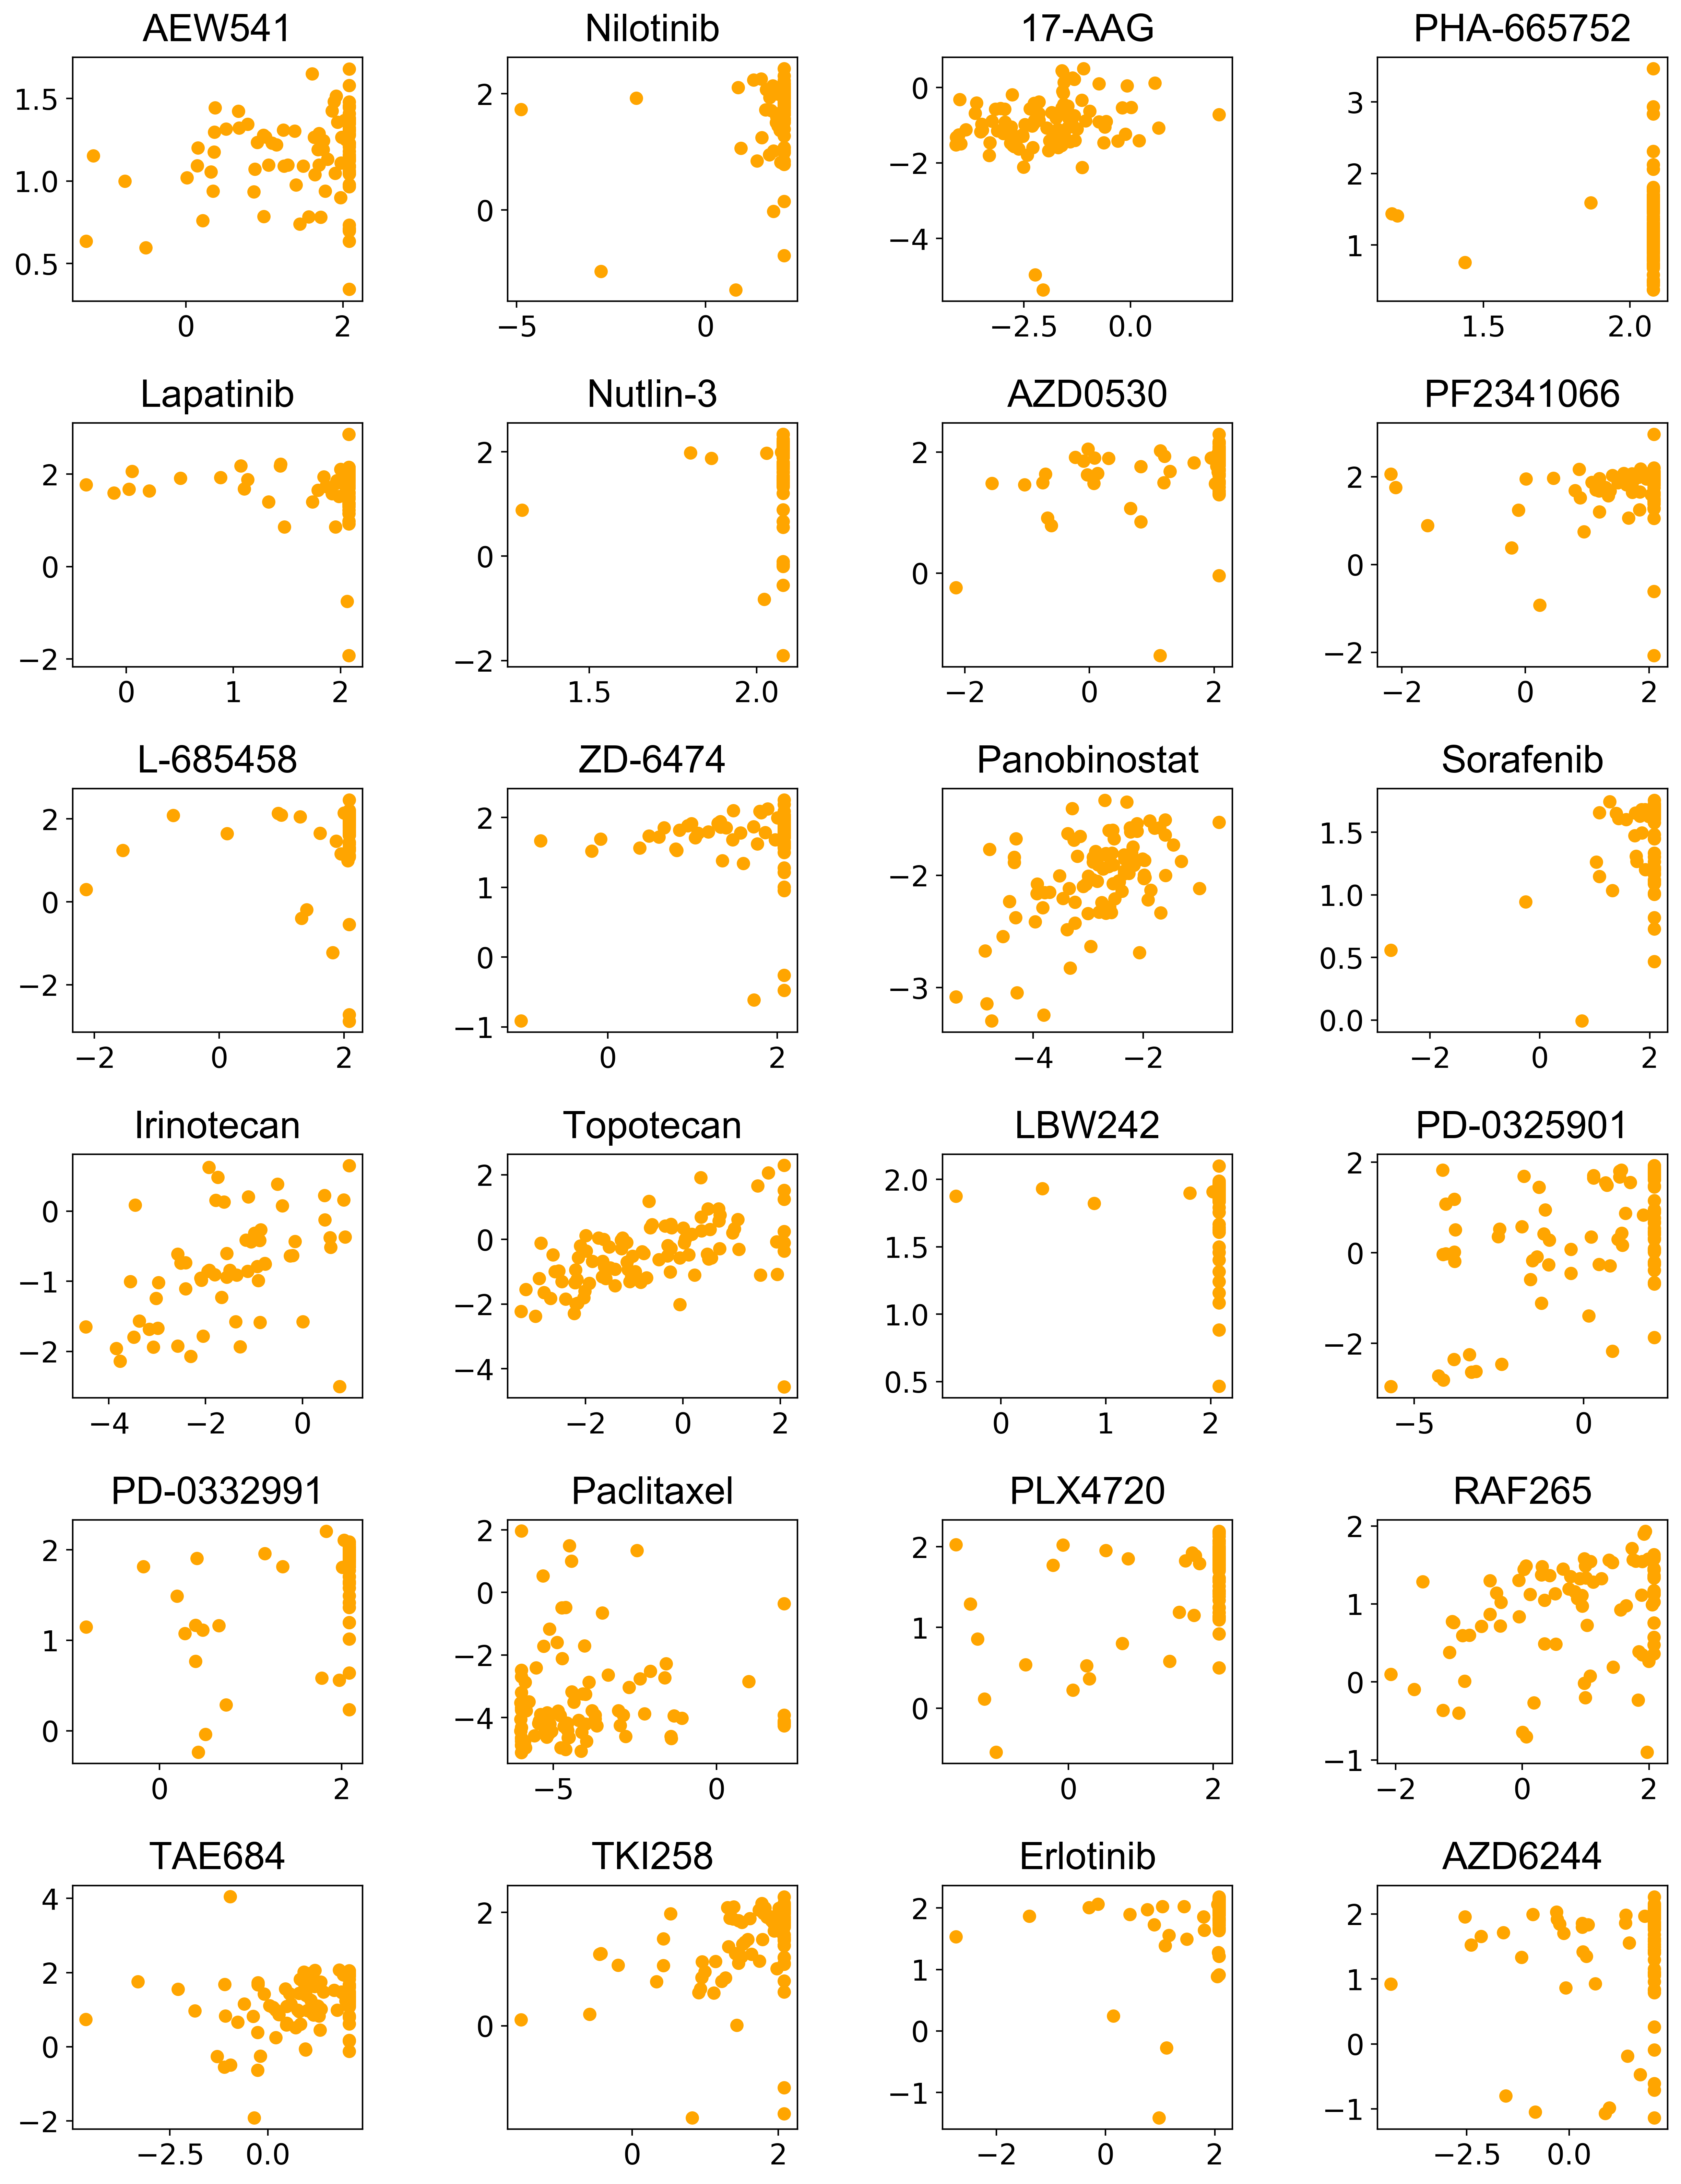

In [5]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_EC11K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_EC11K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]
    
    # data reshape for ResNet
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model architecture
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with K.tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)
    #     predictions = Dense(1, activation='linear', name='predictions')(x)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with K.tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "E://Ronny_TF//200914_reupload//Result//Scenario5_individual_approach//Table//ResNet"
    c.to_csv(workdir + '//200915_scenario5_ResNet_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = '0' 

    # out of memory
    import tensorflow as tf
    with tf.Graph().as_default():
        gpu_options = tf.GPUOptions(allow_growth=True)

    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    reset_keras()
    workdir = "E://Ronny_TF//200914_reupload//Dataset//Scenario5_individual_model_approach"
workdir = "E://Ronny_TF//200914_reupload//Result//Scenario5_individual_approach//Figure"

plt.savefig(workdir +'//200915_scenario5_ResNet_plot.png', dpi=400)

In [6]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [7]:
result

,Drug,RMSE,R2value
0,AEW541,0.860604,-0.196928
1,Nilotinib,1.104043,-0.142018
2,17-AAG,1.599265,-0.968540
3,PHA-665752,0.932141,-42.689474
4,Lapatinib,0.786002,-1.234468
5,Nutlin-3,0.780897,-82.189724
6,AZD0530,0.900062,0.133542
7,PF2341066,0.941879,-0.291759
8,L-685458,1.055254,-1.422838
9,ZD-6474,0.725788,-0.244811


In [8]:
workdir = "E://Ronny_TF//200914_reupload//Result//Scenario5_individual_approach"
result.to_csv(workdir +'//200915_scenario5_ResNet_24drugs_metrics.csv', index=False)